<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Interpolation with Lagrange Polynomials</div>
        </div>
    </div>
</div>

<p style="width:20%;float:right;padding-left:50px">
<img src=../../share/images/book.jpg>
<span style="font-size:smaller">
</span>
</p>


---

This notebook is part of the supplementary material 
to [Computational Seismology: A Practical Introduction](https://global.oup.com/academic/product/computational-seismology-9780198717416?cc=de&lang=en&#), 
Oxford University Press, 2016.


##### Authors:
* Florian Wölfl ([@flo-woelfl](https://github.com/flo-woelfl))
* Stephanie Wollherr ([@swollherr](https://github.com/swollherr))
* Heiner Igel ([@heinerigel](https://github.com/heinerigel))
---

We can approximate an arbitrary function $f(x)$ using the interpolation with Lagrange polynomials $l_i$ at given collacation points $x_i$, i.e.

\begin{eqnarray*}
f(x) = \sum f(x_i) \cdot l_i(x).
\end{eqnarray*}

The Lagrange polynomials at $x$ are defined as follows:

$$ \ell_i^{(N)} (x) \ := \ \prod_{k = 1, \ k \neq i}^{N+1} \frac{x - x_k}{x_i-x_k}, \qquad   i = 1, 2, \dotsc , N + 1  $$


They are implemented in Python with the following code:

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from gll import gll

# Prettier plots.
plt.style.use('ggplot')

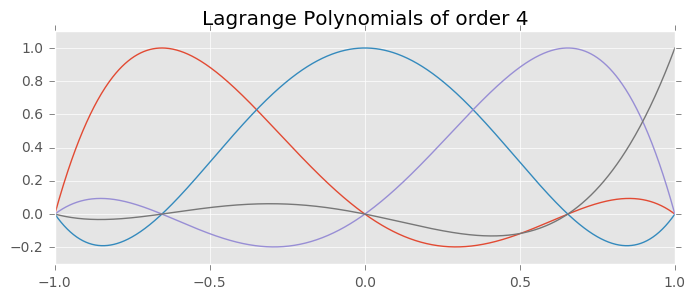

In [2]:
def lagrange2(N, i, x, xi):
    """
    Function to calculate  Lagrange polynomial for order N
    and polynomial i [0, N] at location x at given collacation points xi
    (not necessarily the GLL-points)
    """
    fac = 1
    for j in range(-1, N):
        if j != i:
            fac = fac * ((x - xi[j + 1]) / (xi[i + 1] - xi[j + 1]))
    return fac

N = 4
x = np.linspace(-1, 1, 1000)
xi, _ = gll(N)

plt.figure(figsize=(8, 3))
for _i in range(N):
    plt.plot(x, lagrange2(N, _i, x, xi))
plt.ylim(-0.3, 1.1)
plt.title("Lagrange Polynomials of order %i" % N)
plt.show()

##Exercises:

### 1. The GLL-points
* Use the `gll()` routine to determine the collocation points for a given order $N$ in the interval $[-1,1]$.
* Define an arbitrary function $f(x)$ and use the function `lagrange(N,i,x)` to get the $i$-th Lagrange polynomials of order N at the point x.
* Calculate the interpolating function to $f(x)$.
* Show that the interpolation is exact at the collocation points.
* Compare the original function $f(x)$ and the interpolating function on a finely spaced grid. Vary the order of the interpolating polynomials and calculate the error as a function of order.


### 2. Equidistant collocation points and the Runge function
In the first exercise we used the GLL-points that are not equidistant.
Now use equidistant collacation points for the interpolation of your function $f$. Compare the two results.

Change the code for the Runge-function on the interval $[-5,5]$

$$ f(x)=\frac{1}{(1+x^2)} $$

What do you notice when you decrease the order of your interpolation?

 Give polynomials degree (N): 8


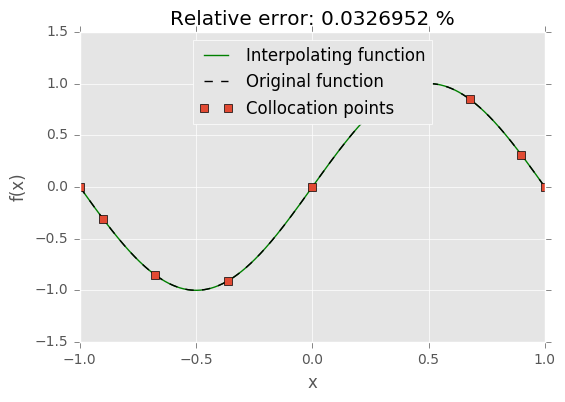

In [3]:
# CHOOSE THE EXERCISE
exercise = 1

# Exercise 1
if exercise == 1:
    # Initialize space in the interval [-1, 1]
    nx = 1000
    x = np.linspace(-1, 1, nx)
    
    # CHANGE FUNCTION HERE. Currently a simple sine function.
    f = np.sin(np.pi * x)
    
# Exercise 2
elif exercise == 2:
    # Initialize space in the interval [-5, 5]
    nx = 1000
    x = np.linspace(-5, 5, nx)
    # CHANGE FUNCTION HERE. Currently the Runge function.
    f = 1/(1 + x ** 2)

# Get order of Lagrange polynomial
N = int(input(' Give polynomials degree (N): '))


if exercise == 1:
    # Get collocation points xi from gll routine   
    [xi, w] = gll(N)
    fi = np.interp(xi, x, f) 
elif exercise == 2:
    xi = np.linspace(-5, 5, N+1)
    fi = np.interp(xi, x, f)

    
# Initialize Lagrange polynomials on the defined grid
lp = np.zeros((N + 1, len(x)))
for i in range(0, len(x)):
    for j in range(-1, N):
        lp[j + 1, i] = lagrange2(N, j, x[i], xi)


# Calculate interpolating polynomials by multiplying 
# Lagrange polynomials with function values at xi
s = x * 0
for j in range(0, N + 1):   
    s = s + lp[j, :] * fi[j]

error = np.sum((np.abs(f - s))) / np.sum(np.abs(f)) * 100

# Plot results  
plt.figure()
plt.plot(x, s, 'k-', color='green', label='Interpolating function')
plt.plot(x, f, 'k--', label='Original function')
plt.plot(xi, fi, 's', label='Collocation points')
plt.title('Relative error: %g %%' % error)
plt.xlabel('x')
plt.ylabel('f(x)')

if exercise == 1:
    plt.legend(loc="upper center")
elif exercise == 2:
    plt.xlim(-5, 5)
    plt.legend(loc=2)

plt.show()